In [29]:
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'df_imputed_tot_OHE.pkl'
df = pd.read_pickle(filename)

In [30]:
df.describe()

,age_0,age_1,age_2,age_3,age_4,sex_0,sex_1,cp_1,cp_2,cp_3,...,exang_0,exang_1,oldpeak_0,oldpeak_1,oldpeak_2,oldpeak_3,slope_1,slope_2,slope_3,heartdisease
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.213043,0.208696,0.218478,0.191304,0.168478,0.210870,0.789130,0.050000,0.189130,0.221739,...,0.633696,0.366304,0.415217,0.145652,0.142391,0.296739,0.556522,0.375000,0.068478,0.553261
std,0.409681,0.406597,0.413438,0.393542,0.374494,0.408148,0.408148,0.218063,0.391825,0.415642,...,0.482056,0.482056,0.493028,0.352949,0.349641,0.457069,0.497065,0.484386,0.252702,0.497426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score

X = df[df.columns[:-1]]
Y = pd.Series(df['heartdisease'])


train_X,test_X,train_Y,test_Y =train_test_split(X,Y,test_size=0.33,shuffle = True, random_state=45)

print(train_X.shape,train_Y.shape,test_X.shape, test_Y.shape)



(616, 40) (616,) (304, 40) (304,)


In [32]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1,probability=True )
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
pred_training = model.predict(train_X)
print('Test Accuracy for linear SVM is',metrics.accuracy_score(test_Y, prediction2))
print('Training Accuracy for linear SVM is',metrics.accuracy_score(train_Y, pred_training))



#print('F1 micro: is',f1_score(test_Y, prediction2, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction2, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction2, average='weighted'))



model_Linear_SVM = model
        
    







Test Accuracy for linear SVM is 0.8355263157894737
Training Accuracy for linear SVM is 0.8035714285714286


In [33]:
model=svm.SVC(kernel='rbf',C=1e4,gamma=1e-4, probability=True)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for rbf SVM is',metrics.accuracy_score(train_Y, pred_training))


#print('F1 micro: is',f1_score(test_Y, prediction1, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction1, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction1, average='weighted'))
model_RBF_SVM = model



Accuracy for rbf SVM is  0.8355263157894737
Training Accuracy for rbf SVM is 0.8068181818181818


In [34]:
model = LogisticRegression(penalty= 'l2', C = 0.01)

model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for Logistic Regression is',metrics.accuracy_score(train_Y, pred_training))


#print('F1 micro: is',f1_score(test_Y, prediction3, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction3, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction3, average='weighted'))

model_Logistic_Regression = model
#model.get_params()



The accuracy of the Logistic Regression is 0.8421052631578947
Training Accuracy for Logistic Regression is 0.7808441558441559


The accuracy of the Decision Tree is 0.7828947368421053
Training Accuracy for Decision Tree is 0.7954545454545454


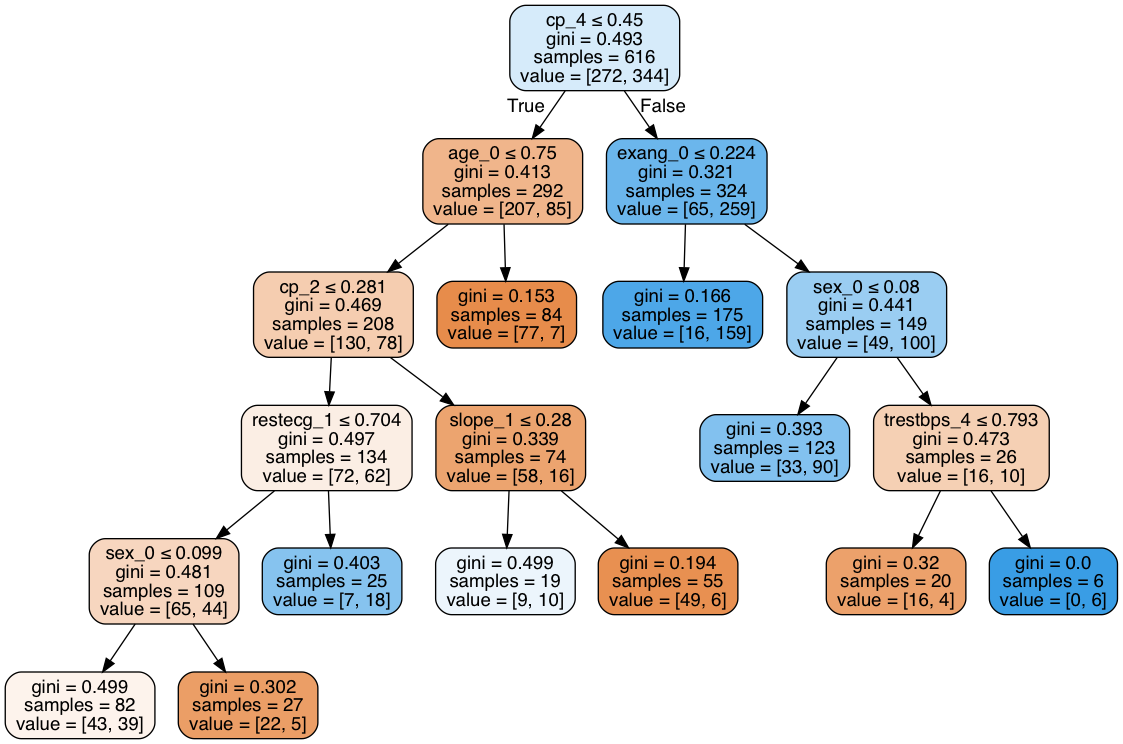

In [35]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus




model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')


model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for Decision Tree is',metrics.accuracy_score(train_Y, pred_training))

#print('F1 micro: is',f1_score(test_Y, prediction4, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction4, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction4, average='weighted'))




model_Decision_Tree = model

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=train_X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

plt.show(graph)

Image(graph.create_png())

#graph.write_pdf("decision_tree_OHE.pdf")



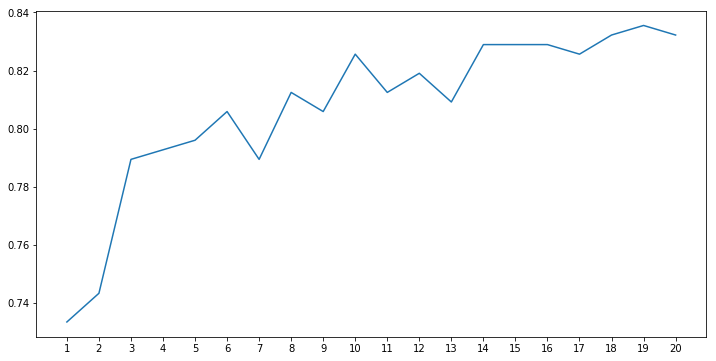

Accuracies for different values of n are: [0.73355263 0.74342105 0.78947368 0.79276316 0.79605263 0.80592105
 0.78947368 0.8125     0.80592105 0.82565789 0.8125     0.81907895
 0.80921053 0.82894737 0.82894737 0.82894737 0.82565789 0.83223684
 0.83552632 0.83223684] with the max value as  0.8355263157894737  with index:  18


In [36]:
a_index=list(range(1,21))
a=pd.Series()
x=list(range(1, 21))
for i in list(range(1,21)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',(a.values.max()), ' with index: ', a.values.argmax(axis=0))

model_KNN = KNeighborsClassifier(n_neighbors=65)




In [37]:
train_y = train_Y
test_y = test_Y
rfc_best = RandomForestClassifier(n_estimators= 400,
               max_features= 'sqrt',
               max_depth= 30,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)
rfc_base = RandomForestClassifier(n_estimators= 200, random_state = 42)



rfc_base.fit(train_X, train_y)
rfc_best.fit(train_X, train_y)
prediction_base=rfc_base.predict(test_X)
prediction_best=rfc_best.predict(test_X)


print('Test Accuracy for RF base is ',metrics.accuracy_score(prediction_base,test_y))
print('Test Accuracy for RF best is ',metrics.accuracy_score(prediction_best,test_y))


prediction_base_train=rfc_base.predict(train_X)
prediction_best_train=rfc_best.predict(train_X)
print('Train Accuracy for RF base is ',metrics.accuracy_score(train_y,prediction_base_train))
print('Train Accuracy for RF best is ',metrics.accuracy_score(train_y,prediction_best_train))


model_RandomForest = rfc_best



Test Accuracy for RF base is  0.8256578947368421
Test Accuracy for RF best is  0.819078947368421
Train Accuracy for RF base is  1.0
Train Accuracy for RF best is  0.8701298701298701


In [191]:

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction




kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree,  model_RandomForest ]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.803261,0.030532
Radial Svm,0.804348,0.033325
Logistic Regression,0.796739,0.042112
KNN,0.789130,0.036441
Decision Tree,0.779348,0.042669
Random Forest,0.794565,0.039326


In [39]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree,  model_RandomForest ]

fit_time = []
score_time = []

test_accuracy = []
test_accuracy_std = []
train_accuracy = []
train_accuracy_std = []


test_F_score = []
test_F_score_std = []
train_F_score = []
train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []






for i in models:
    model = i
    scores = cross_validate(model,X,Y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)
#new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
#new_models_dataframe2

Model: SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Model: SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=65, p=2,
           weights='uniform')
Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
      

,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Linear Svm,0.803261,0.030532,0.820773,0.003976
Radial Svm,0.804348,0.033325,0.825845,0.004855
Logistic Regression,0.796739,0.042112,0.808937,0.002796
KNN,0.789130,0.036441,0.808092,0.005108
Decision Tree,0.779348,0.042669,0.801329,0.007528
Random Forest,0.793478,0.044286,0.869928,0.002649


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Linear Svm,0.813616,0.050835,0.841219,0.007405
Radial Svm,0.811720,0.058314,0.845719,0.006887
Logistic Regression,0.807333,0.056602,0.830208,0.008832
KNN,0.795344,0.052439,0.827082,0.013193
Decision Tree,0.804859,0.044853,0.831577,0.006347
Random Forest,0.809170,0.051769,0.886182,0.005841


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Linear Svm,0.796182,0.084611,0.823808,0.004158
Radial Svm,0.800844,0.077107,0.828415,0.006681
Logistic Regression,0.795216,0.092333,0.815254,0.004045
KNN,0.806924,0.093799,0.822245,0.005789
Decision Tree,0.751582,0.078595,0.782886,0.012406
Random Forest,0.785313,0.091389,0.857525,0.002842


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Linear Svm,0.838106,0.051721,0.859452,0.012554
Radial Svm,0.829112,0.077422,0.863884,0.012457
Logistic Regression,0.828279,0.067296,0.846045,0.020396
KNN,0.793581,0.068982,0.832494,0.027203
Decision Tree,0.873465,0.042217,0.887156,0.015859
Random Forest,0.843319,0.059444,0.916888,0.011285


,Fit_time,Scoring Time
Linear Svm,0.087484,0.007365
Radial Svm,0.213441,0.010602
Logistic Regression,0.002006,0.001990
KNN,0.001934,0.022983
Decision Tree,0.001879,0.002275
Random Forest,0.538151,0.121311


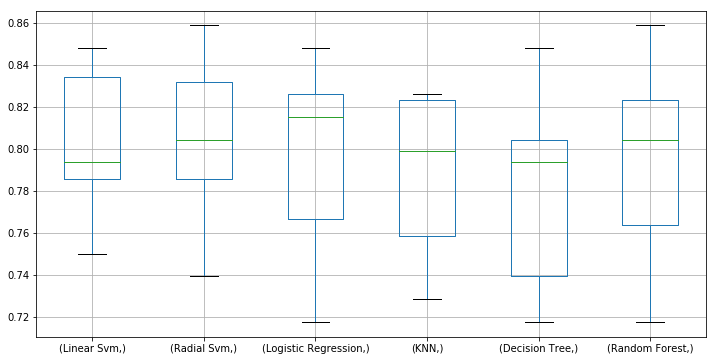

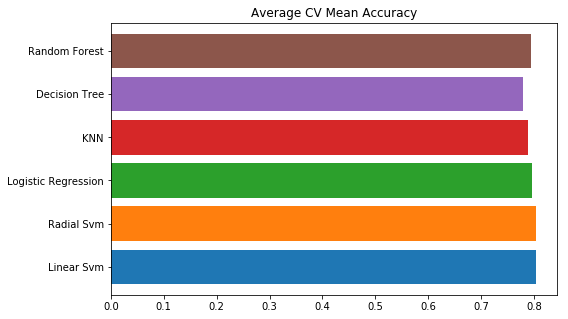

In [192]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

Text(0.5,1,'Matrix for Decision Tree')

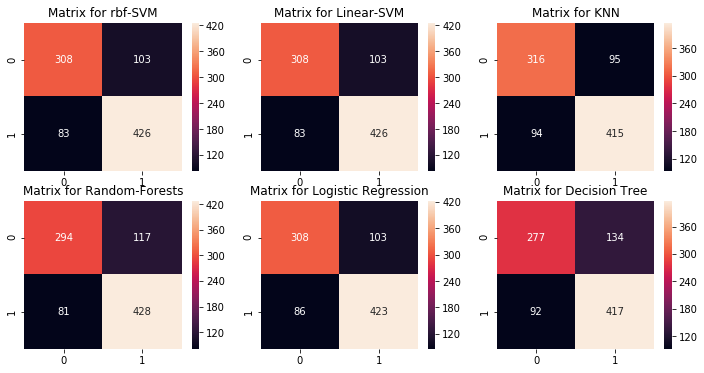

In [193]:
models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree,  model_RandomForest ]
f,ax=plt.subplots(2,3,figsize=(12,6))
y_pred = cross_val_predict(model_RBF_SVM,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(model_Linear_SVM,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(model_KNN,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(model_RandomForest,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(model_Logistic_Regression,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(model_Decision_Tree,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')


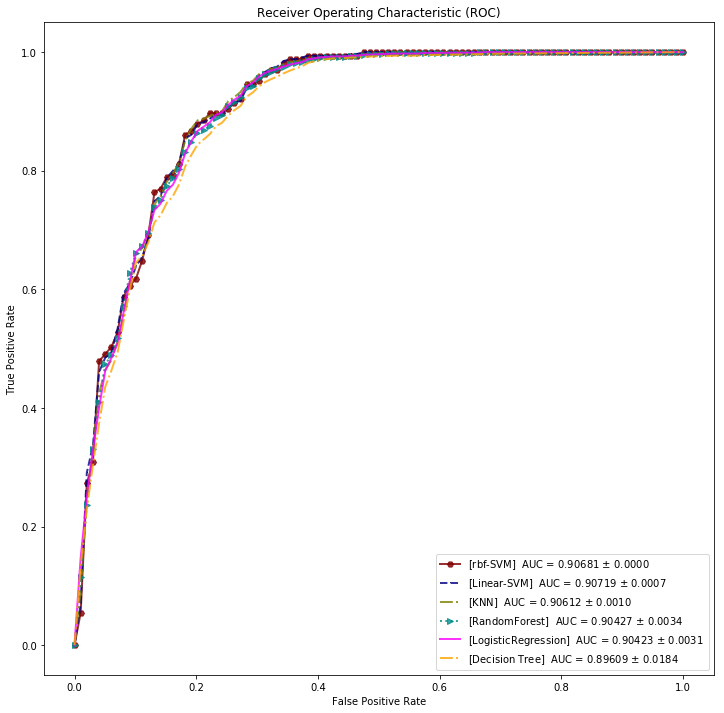

In [170]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#'aqua', 'darkorange', 'cornflowerblue'
models = [
    {
        'label' : 'rbf-SVM',
        'model': model_RBF_SVM,
        'color': 'maroon',
        'linestyle': 'solid', 
        'markers': 'H',
         
    },
    {
        'label' : 'Linear-SVM',
        'model': model_Linear_SVM,
        'color': 'navy',
        'linestyle': 'dashed',
        'markers': ',',
    },
    {
        'label' : 'KNN',
        'model': model_KNN, 
        'color': 'olive',
        'linestyle': 'dashdot',
        'markers': '',
    },    
    {
        'label' : 'RandomForest',
        'model': model_RandomForest,
        'color': 'darkcyan',
        'linestyle': 'dotted',
        'markers': '>',
       
    },        
    {
        'label' : 'LogisticRegression',
        'model': model_Logistic_Regression,
        'color': 'fuchsia',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': model_Decision_Tree, 
        'color': 'orange',
        'linestyle': '-.',
        'markers': ''
    },

]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
y = Y



   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for train, test in cv.split(X, y):
        probas_ = m['model'].fit(train_X, train_Y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)




    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()





In [171]:
from sklearn.ensemble import VotingClassifier

models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree, model_GaussianNB,  model_RandomForest ]


ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',model_KNN),
                                              ('RBF',model_RBF_SVM),
                                              ('RFor',model_RandomForest),
                                              ('LR',model_Logistic_Regression),
                                              ('DT',model_Decision_Tree),
                                              ('svm',model_Linear_SVM)
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The accuracy for ensembled model is: 0.8289473684210527


/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: Th

The cross validated score is 0.7879890212639161


/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [181]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=model_KNN,random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

bagged_KNN = model

The accuracy for bagged KNN is: 0.8519736842105263
The cross validated score for bagged KNN is: 0.792349562545916


In [180]:
from sklearn.ensemble import BaggingClassifier
bagged_Decision_Tree= BaggingClassifier(base_estimator=model_Decision_Tree,random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged_Decision_Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged_Decision_Tree is:',result.mean())

bagged_Decision_Tree = model

The accuracy for bagged_Decision_Tree is: 0.8289473684210527
The cross validated score for bagged_Decision_Tree is: 0.7835941874861931


In [182]:
model=BaggingClassifier(base_estimator=model_Logistic_Regression,random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Logistic Regression is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Logistic Regression is:',result.mean())

bagged_Logistic_Regression = model

The accuracy for bagged Logistic Regression is: 0.8421052631578947
The cross validated score for bagged Logistic Regression is: 0.7955748552522747


In [183]:
model=BaggingClassifier(base_estimator=model_RBF_SVM,random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged RBF_SVM is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged RBF_SVM is:',result.mean())

bagged_RBF_SVM = model

The accuracy for bagged RBF_SVM is: 0.8322368421052632
The cross validated score for bagged RBF_SVM is: 0.7978196651408431


In [184]:
model=BaggingClassifier(base_estimator=model_Linear_SVM,random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Linear_SVM is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Linear_SVM is:',result.mean())

bagged_Linear_SVM = model

The accuracy for bagged Linear_SVM is: 0.8256578947368421
The cross validated score for bagged Linear_SVM is: 0.7988946770854205


In [186]:

model=BaggingClassifier(base_estimator=model_RandomForest,random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged RandomForest is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged RandomForest is:',result.mean())
bagged_RandomForest = model

The accuracy for bagged RandomForest is: 0.8289473684210527
The cross validated score for bagged RandomForest is: 0.7835941874861931


In [187]:


from sklearn.ensemble import VotingClassifier




ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',bagged_KNN),
                                              ('RBF',bagged_RBF_SVM),
                                              ('RFor',bagged_RandomForest),
                                              ('LR',bagged_Logistic_Regression),
                                              ('DT',bagged_Decision_Tree),
                                              ('svm',bagged_Linear_SVM)
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())









/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The accuracy for ensembled model is: 0.8388157894736842


/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: Th

The cross validated score is 0.7890523455039584


/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction




kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[bagged_Linear_SVM, bagged_RBF_SVM, bagged_Logistic_Regression, bagged_KNN, bagged_Decision_Tree,   bagged_RandomForest ]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

In [189]:
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.805435,0.029748
Radial Svm,0.805435,0.030916
Logistic Regression,0.796739,0.041547
KNN,0.794565,0.029748
Decision Tree,0.795652,0.041190
Random Forest,0.795652,0.041190


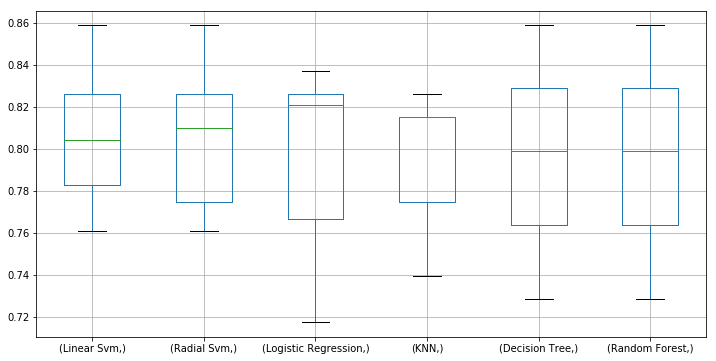

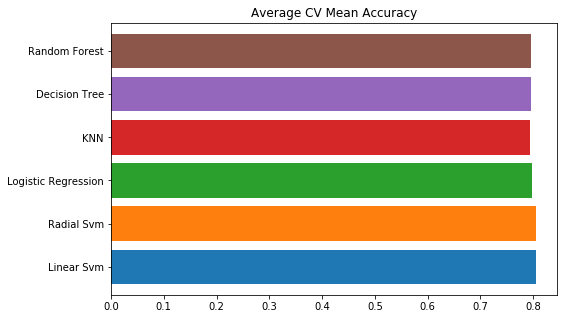

In [190]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

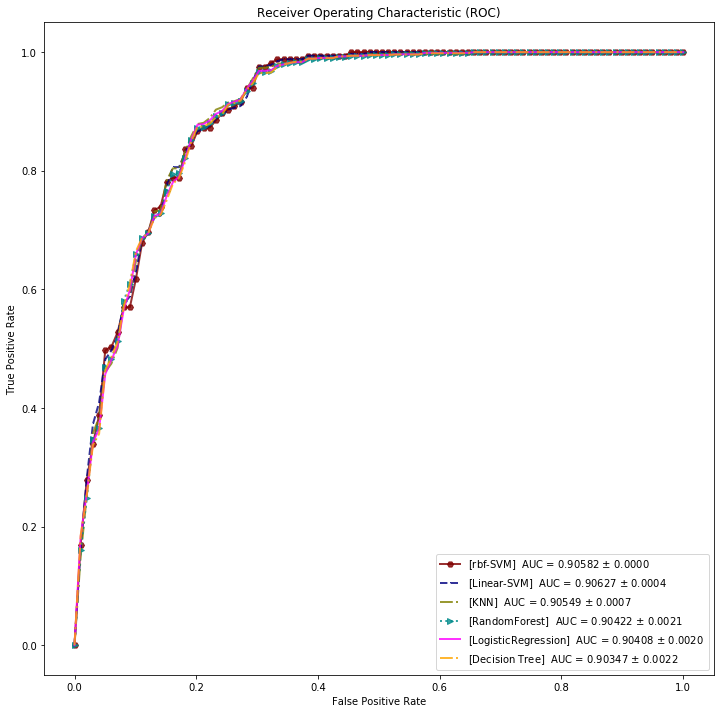

In [194]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

models=[bagged_Linear_SVM, bagged_RBF_SVM, bagged_Logistic_Regression, bagged_KNN, bagged_Decision_Tree,   bagged_RandomForest ]
models = [
    {
        'label' : 'rbf-SVM',
        'model': bagged_RBF_SVM,
        'color': 'maroon',
        'linestyle': 'solid', 
        'markers': 'H',
         
    },
    {
        'label' : 'Linear-SVM',
        'model': bagged_Linear_SVM,
        'color': 'navy',
        'linestyle': 'dashed',
        'markers': ',',
    },
    {
        'label' : 'KNN',
        'model': bagged_KNN, 
        'color': 'olive',
        'linestyle': 'dashdot',
        'markers': '',
    },    
    {
        'label' : 'RandomForest',
        'model': bagged_RandomForest,
        'color': 'darkcyan',
        'linestyle': 'dotted',
        'markers': '>',
       
    },        
    {
        'label' : 'LogisticRegression',
        'model': bagged_Logistic_Regression,
        'color': 'fuchsia',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': bagged_Decision_Tree, 
        'color': 'orange',
        'linestyle': '-.',
        'markers': ''
    },

]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
y = Y



   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for train, test in cv.split(X, y):
        probas_ = m['model'].fit(train_X, train_Y).predict_proba(test_X)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_Y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        

        i += 1
    #plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    #         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)
    
    #std_tpr = np.std(tprs, axis=0)
    #tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    #tprs_lower = np.maximum(mean_tpr - std_tpr, 0)




    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

plt.show()






In [196]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=800,random_state=0,learning_rate=0.01)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7923022979825224


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

In [197]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.2min finished


0.7804347826086957
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=100, random_state=None)


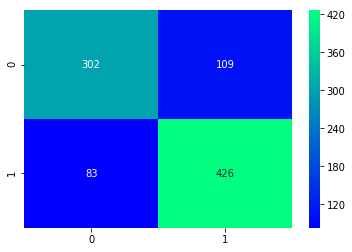

In [198]:
ada=AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 41 columns):
age_0           920 non-null float64
age_1           920 non-null float64
age_2           920 non-null float64
age_3           920 non-null float64
age_4           920 non-null float64
sex_0           920 non-null float64
sex_1           920 non-null float64
cp_1            920 non-null float64
cp_2            920 non-null float64
cp_3            920 non-null float64
cp_4            920 non-null float64
trestbps_0      920 non-null float64
trestbps_1      920 non-null float64
trestbps_2      920 non-null float64
trestbps_3      920 non-null float64
trestbps_4      920 non-null float64
chol_0          920 non-null float64
chol_1          920 non-null float64
chol_2          920 non-null float64
chol_3          920 non-null float64
chol_4          920 non-null float64
fbs_0           920 non-null float64
fbs_1           920 non-null float64
restecg_0       920 non-null float64
restecg